Classification Methods Using Various Models:
* Logistic Regression
* K-Nearest Neighbor
* Support Vector Machine
* Decision Tree
* Random Forest 

Dataset Used From Kaggle:

This dataset is synthetically generated to mimic weather data for classification tasks. It includes various weather-related features and categorizes the weather into four types: Rainy, Sunny, Cloudy, and Snowy. This dataset is designed for practicing classification algorithms, data preprocessing, and outlier detection methods.

Variables:

* Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
* Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
* Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
* Precipitation (%) (numeric): The precipitation percentage, including outlier values.
* Cloud Cover (categorical): The cloud cover description.
* Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
* UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
* Season (categorical): The season during which the data was recorded.
* Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
* Location (categorical): The type of location where the data was recorded.
* Weather Type (categorical): The target variable for classification, indicating the weather type.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

Load Data Into X Variable

In [2]:
weather = pd.read_csv('weather_classification_data.csv')
display(weather.info())
display(weather)
display(weather.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


None

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [6]:
X = weather.iloc[:, :-1]
display(X)

y = weather.iloc[:, -1]
y

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain
...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland


0         Rainy
1        Cloudy
2         Sunny
3         Sunny
4         Rainy
          ...  
13195     Rainy
13196     Snowy
13197    Cloudy
13198     Snowy
13199     Rainy
Name: Weather Type, Length: 13200, dtype: object

Scale Data and Label Categorical Variables

In [7]:
label = LabelEncoder()
scaler = StandardScaler()

for column in X:
    if  X[column].dtype == 'object':
        X[column] = label.fit_transform(X[column])
        
display(X)
    
X = scaler.fit_transform(X)
display(X)

y = label.fit_transform(y)


display(y)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2
...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1


array([[-0.29493119,  0.21240351, -0.04808565, ...,  0.98783148,
        -0.58223095, -0.1188932 ],
       [ 1.14303484,  1.35138482, -0.19283608, ..., -0.72923141,
         1.34576796, -0.1188932 ],
       [ 0.62536707, -0.23328483, -0.40996172, ..., -0.72923141,
         0.01099948,  1.14470601],
       ...,
       [ 0.62536707,  0.41048722, -0.62708737, ..., -1.58776285,
         1.04915274, -1.3824924 ],
       [-0.92763624,  0.36096629,  0.02428956, ...,  0.98783148,
        -1.02715378, -0.1188932 ],
       [-1.38778537, -1.52082893, -1.42321472, ..., -1.58776285,
         1.34576796,  1.14470601]])

array([1, 0, 3, ..., 0, 2, 1])

# Logistic Regression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predicting Test Results

In [10]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[1 1]
 [2 2]
 [0 0]
 ...
 [2 2]
 [1 1]
 [1 0]]


Confusion Matrix and Accurarcy Score

In [11]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)


[[671  87  19  52]
 [ 41 719  44  25]
 [ 17   9 771  31]
 [ 84  30  19 681]]


0.8612121212121212

# K-Nearest Neighbor

In [14]:
neighbor = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
neighbor.fit(X_train,y_train)

KNeighborsClassifier()

Confusion Matrix and Accuracy Score

In [16]:
y_p_neigh = neighbor.predict(X_test)
cm = confusion_matrix(y_test, y_p_neigh)
print(cm)
accuracy_score(y_test, y_p_neigh)

[[729  62  17  21]
 [ 41 749  30   9]
 [ 17  22 767  22]
 [ 35  28  12 739]]


0.9042424242424243

# Support Vector Machoine

In [19]:
supp = SVC(kernel='linear', random_state=0)
supp.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

Confusion Matrix and Accuracy Score

In [21]:
y_p_supp = supp.predict(X_test)
cm = confusion_matrix(y_test, y_p_supp)
print(cm)
accuracy_score(y_test, y_p_supp)

[[687  78  14  50]
 [ 31 737  30  31]
 [ 15   7 774  32]
 [ 61  16  23 714]]


0.8824242424242424

# Decision Tree

In [22]:
deci_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
deci_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Confusion Matrix and Accuracy Score

In [23]:
y_p_dt = deci_tree.predict(X_test)
cm = confusion_matrix(y_test, y_p_dt)
print(cm)
accuracy_score(y_test, y_p_dt)

[[738  36  20  35]
 [ 46 745  22  16]
 [ 10  24 774  20]
 [ 20  20  20 754]]


0.9124242424242425

Random Forest

In [34]:
rand_for = RandomForestClassifier(n_estimators=12, criterion='entropy', random_state=0)
rand_for.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=12, random_state=0)

Confusion Matrix and Accuracy Score

In [35]:
y_p_rf = rand_for.predict(X_test)
cm = confusion_matrix(y_test, y_p_rf)
print(cm)
accuracy_score(y_test, y_p_rf)

[[743  46  16  24]
 [ 29 773  13  14]
 [ 28  19 772   9]
 [ 26  16  15 757]]


0.9227272727272727

Confusion Matrix Display

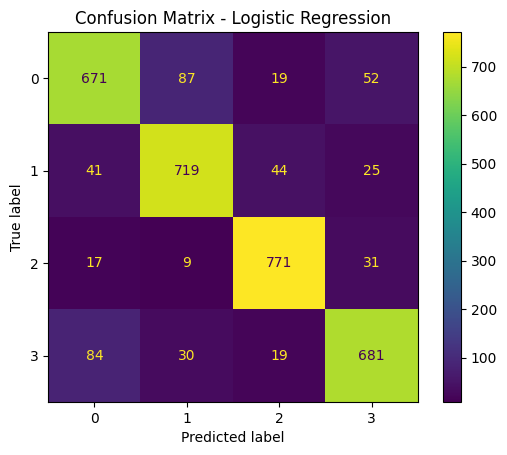

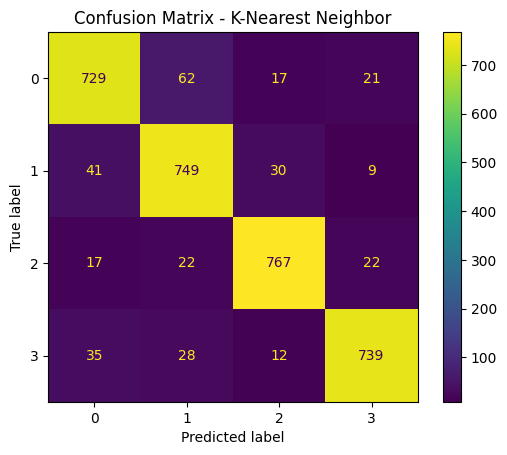

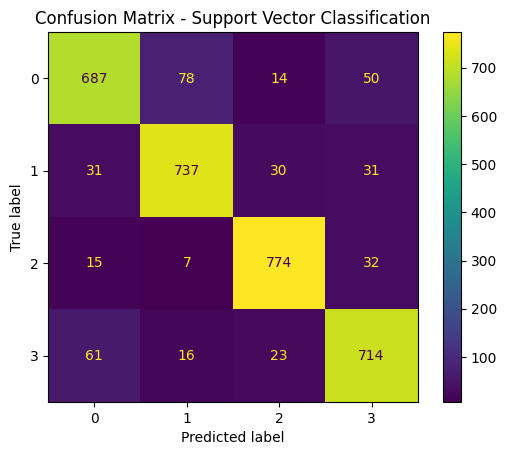

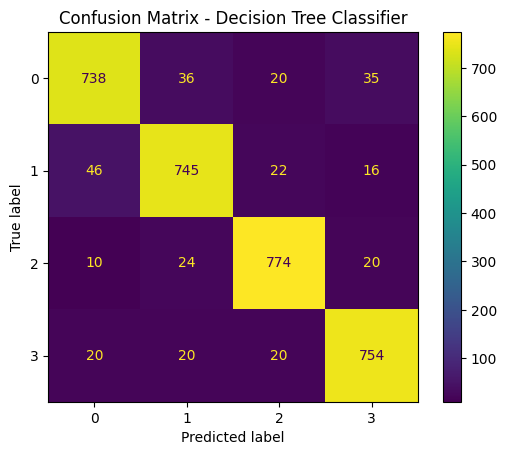

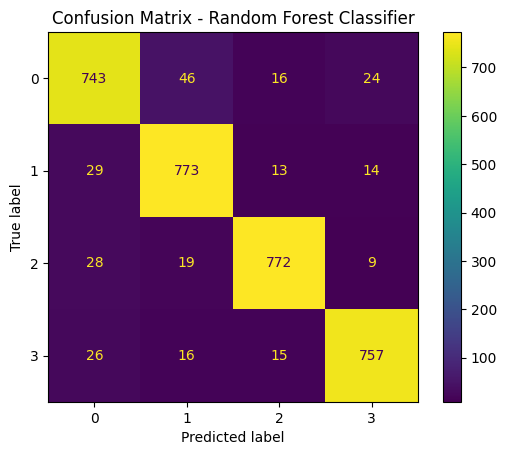

In [51]:
models = [classifier, neighbor, supp, deci_tree, rand_for]
model_names = ['Logistic Regression', 'K-Nearest Neighbor', 'Support Vector Classification', 'Decision Tree Classifier', 'Random Forest Classifier']

for model, name in zip(models, model_names):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'Confusion Matrix - {name}')
    plt.savefig(f'{name}_Confusion_Matrix.png', format='png')
    plt.show()

In [50]:
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(f'The accuracy score of {name} is: {accuracy_score(y_test, y_pred)}')

The accuracy score of Logistic Regression is: 0.8612121212121212
The accuracy score of K-Nearest Neighbor is: 0.9042424242424243
The accuracy score of Support Vector Classification is: 0.8824242424242424
The accuracy score of Decision Tree Classifier is: 0.9124242424242425
The accuracy score of Random Forest Classifier is: 0.9227272727272727
